In [24]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, BatchNormalization, Dropout
import os

In [26]:
import zipfile


In [27]:
import keras

In [28]:
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [29]:
train_data = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_dataset = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 25000 files belonging to 1 classes.
Found 12500 files belonging to 1 classes.


In [30]:
def transform(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label
train_data = train_data.map(transform)
validation_dataset = validation_dataset.map(transform)

In [31]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(train_data, epochs=10, validation_data=validation_dataset)

Epoch 1/10
782/782 [==============================] - 95s 115ms/step - loss: 0.0181 - accuracy: 0.9990 - val_loss: 1.9024e-05 - val_accuracy: 1.0000
Epoch 2/10
782/782 [==============================] - 90s 115ms/step - loss: 2.1798e-06 - accuracy: 1.0000 - val_loss: 4.2709e-14 - val_accuracy: 1.0000
Epoch 3/10
782/782 [==============================] - 91s 116ms/step - loss: 1.6711e-07 - accuracy: 1.0000 - val_loss: 5.7044e-20 - val_accuracy: 1.0000
Epoch 4/10
782/782 [==============================] - 90s 115ms/step - loss: 7.7972e-14 - accuracy: 1.0000 - val_loss: 5.6886e-20 - val_accuracy: 1.0000
Epoch 5/10
782/782 [==============================] - 89s 114ms/step - loss: 3.1128e-18 - accuracy: 1.0000 - val_loss: 4.3568e-20 - val_accuracy: 1.0000
Epoch 6/10
782/782 [==============================] - 90s 114ms/step - loss: 3.0921e-22 - accuracy: 1.0000 - val_loss: 4.1280e-20 - val_accuracy: 1.0000
Epoch 7/10
782/782 [==============================] - 90s 114ms/step - loss: 2.6187e-2

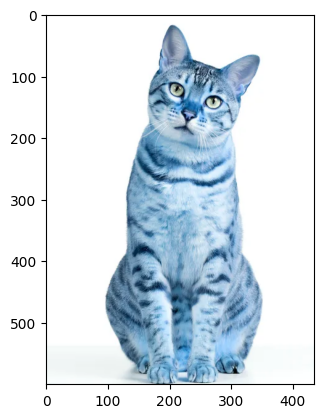

In [35]:
test_image = cv2.imread('/content/cat.jpg')
plt.imshow(test_image)

In [38]:
test_image.shape

(600, 435, 3)

In [39]:
test_image = cv2.resize(test_image,(256,256))

In [40]:
test_input = test_image.reshape((1,256,256,3))

In [41]:
model.predict(test_input)

1/1 [==============================] - 0s 305ms/step


array([[0.]], dtype=float32)